# <font color=#00AA72, font = 'Times New Roman'> **Датасет по конным скачкам в Гонконге - Акимова Елена** </font>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

### <font color=#00AA72, font = 'Times New Roman'> Загрузка датасетов (их у меня два)  </font>

In [2]:
horse_hk_races = pd.read_csv('Horses_HK/races.csv')
horse_hk_races.head(5)

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [3]:
horse_hk_runs = pd.read_csv('Horses_HK/runs.csv')
horse_hk_runs.head(5)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


### <font color=#00AA72, font = 'Times New Roman'> Обработка данных  </font>

#### <font color=#00AA72, font = 'Times New Roman'>  _Посмотрим, какие есть колонки в обоих датасетах_  </font>

In [4]:
races_col = horse_hk_races.columns
races_col

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6',
       'sec_time7', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6',
       'time7', 'place_combination1', 'place_combination2',
       'place_combination3', 'place_combination4', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'place_dividend4',
       'win_combination1', 'win_dividend1', 'win_combination2',
       'win_dividend2'],
      dtype='object')

In [5]:
runs_col = horse_hk_runs.columns
runs_col

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

#### <font color=#00AA72, font = 'Times New Roman'>  _Отлично, есть несколько общих колонок. Объединим датасеты по колонке 'race_id'_  </font>

In [6]:
horses = horse_hk_races.merge(horse_hk_runs, on=["race_id"])
horses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race_id             79447 non-null  int64  
 1   date                79447 non-null  object 
 2   venue               79447 non-null  object 
 3   race_no             79447 non-null  int64  
 4   config              79447 non-null  object 
 5   surface             79447 non-null  int64  
 6   distance            79447 non-null  int64  
 7   going               79447 non-null  object 
 8   horse_ratings       79447 non-null  object 
 9   prize               73598 non-null  float64
 10  race_class          79447 non-null  int64  
 11  sec_time1           79447 non-null  float64
 12  sec_time2           79447 non-null  float64
 13  sec_time3           79447 non-null  float64
 14  sec_time4           46226 non-null  float64
 15  sec_time5           10079 non-null  float64
 16  sec_

#### <font color=#00AA72, font = 'Times New Roman'>  _Теперь попробуем проверить, не осталось ли совпадающих столбцов - дубликатов._  </font>

In [7]:
bool_series = horses.duplicated() 
bs = bool_series
bs 
#Слишком длинный список, не влезает. Попробуем иначе

0        False
1        False
2        False
3        False
4        False
         ...  
79442    False
79443    False
79444    False
79445    False
79446    False
Length: 79447, dtype: bool

In [8]:
np.where(bs)[0] #вывести совпадающие столбцы

array([], dtype=int32)

In [9]:
horses.head(5)

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,time2_y,time3_y,time4_y,time5_y,time6_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


#### <font color=#00AA72, font = 'Times New Roman'>  _Колонки "race_id" и "race_no" выглядят подозрительно. Посмотрим, что они означают и насколько нужны._  </font>

In [10]:
horses[['race_id', 'race_no']]

,race_id,race_no
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
79442,6348,10
79443,6348,10
79444,6348,10
79445,6348,10


#### <font color=#00AA72, font = 'Times New Roman'>  _Действительно, race_id можно удалять._  </font>

In [11]:
del horses['race_id'] 
horses.tail(13)

,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,...,time2_y,time3_y,time4_y,time5_y,time6_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
79434,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.06,23.69,22.19,NaN,NaN,95.96,13.0,NaN,7,9
79435,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,23.94,23.49,22.97,NaN,NaN,96.82,25.0,NaN,75,82
79436,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.06,23.53,22.13,NaN,NaN,95.98,46.0,NaN,60,3
79437,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.10,23.21,21.88,NaN,NaN,96.17,1.6,NaN,137,50
79438,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.06,23.73,23.49,NaN,NaN,96.74,84.0,NaN,138,150
79439,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,23.98,23.65,22.62,NaN,NaN,96.07,36.0,NaN,7,91
79440,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.02,23.73,22.69,NaN,NaN,96.06,6.8,NaN,29,64
79441,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.06,23.45,22.54,NaN,NaN,96.83,57.0,NaN,75,2
79442,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63


#### <font color=#00AA72, font = 'Times New Roman'>  _Теперь поменяем колонки местами, не именуя их все, и посмотрим, какие колонки у нас останутся._  </font>

In [12]:
def order(horses,columns):
    if type(columns) is str:
        columns = [columns]
    varlist =[w for w in horses.columns if w not in columns]
    horses = horses[columns+varlist]
    return horses 
horses = order(horses,['race_no'])
horses

,race_no,date,venue,config,surface,distance,going,horse_ratings,prize,race_class,...,time2_y,time3_y,time4_y,time5_y,time6_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,1,1997-06-02,ST,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,1,1997-06-02,ST,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,1,1997-06-02,ST,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,1,1997-06-02,ST,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,1,1997-06-02,ST,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,10,2005-08-28,ST,A,0,1600,GOOD,100-80,1750000.0,2,...,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,10,2005-08-28,ST,A,0,1600,GOOD,100-80,1750000.0,2,...,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,10,2005-08-28,ST,A,0,1600,GOOD,100-80,1750000.0,2,...,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,10,2005-08-28,ST,A,0,1600,GOOD,100-80,1750000.0,2,...,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


In [13]:
horses.columns

Index(['race_no', 'date', 'venue', 'config', 'surface', 'distance', 'going',
       'horse_ratings', 'prize', 'race_class', 'sec_time1', 'sec_time2',
       'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6', 'sec_time7',
       'time1_x', 'time2_x', 'time3_x', 'time4_x', 'time5_x', 'time6_x',
       'time7', 'place_combination1', 'place_combination2',
       'place_combination3', 'place_combination4', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'place_dividend4',
       'win_combination1', 'win_dividend1', 'win_combination2',
       'win_dividend2', 'horse_no', 'horse_id', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'position_sec1', 'position_sec2', 'position_sec3',
       'position_sec4', 'position_sec5', 'position_sec6', 'behind_sec1',
       'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5',
       'behind_sec6', 'time1_y', '

<AxesSubplot:>

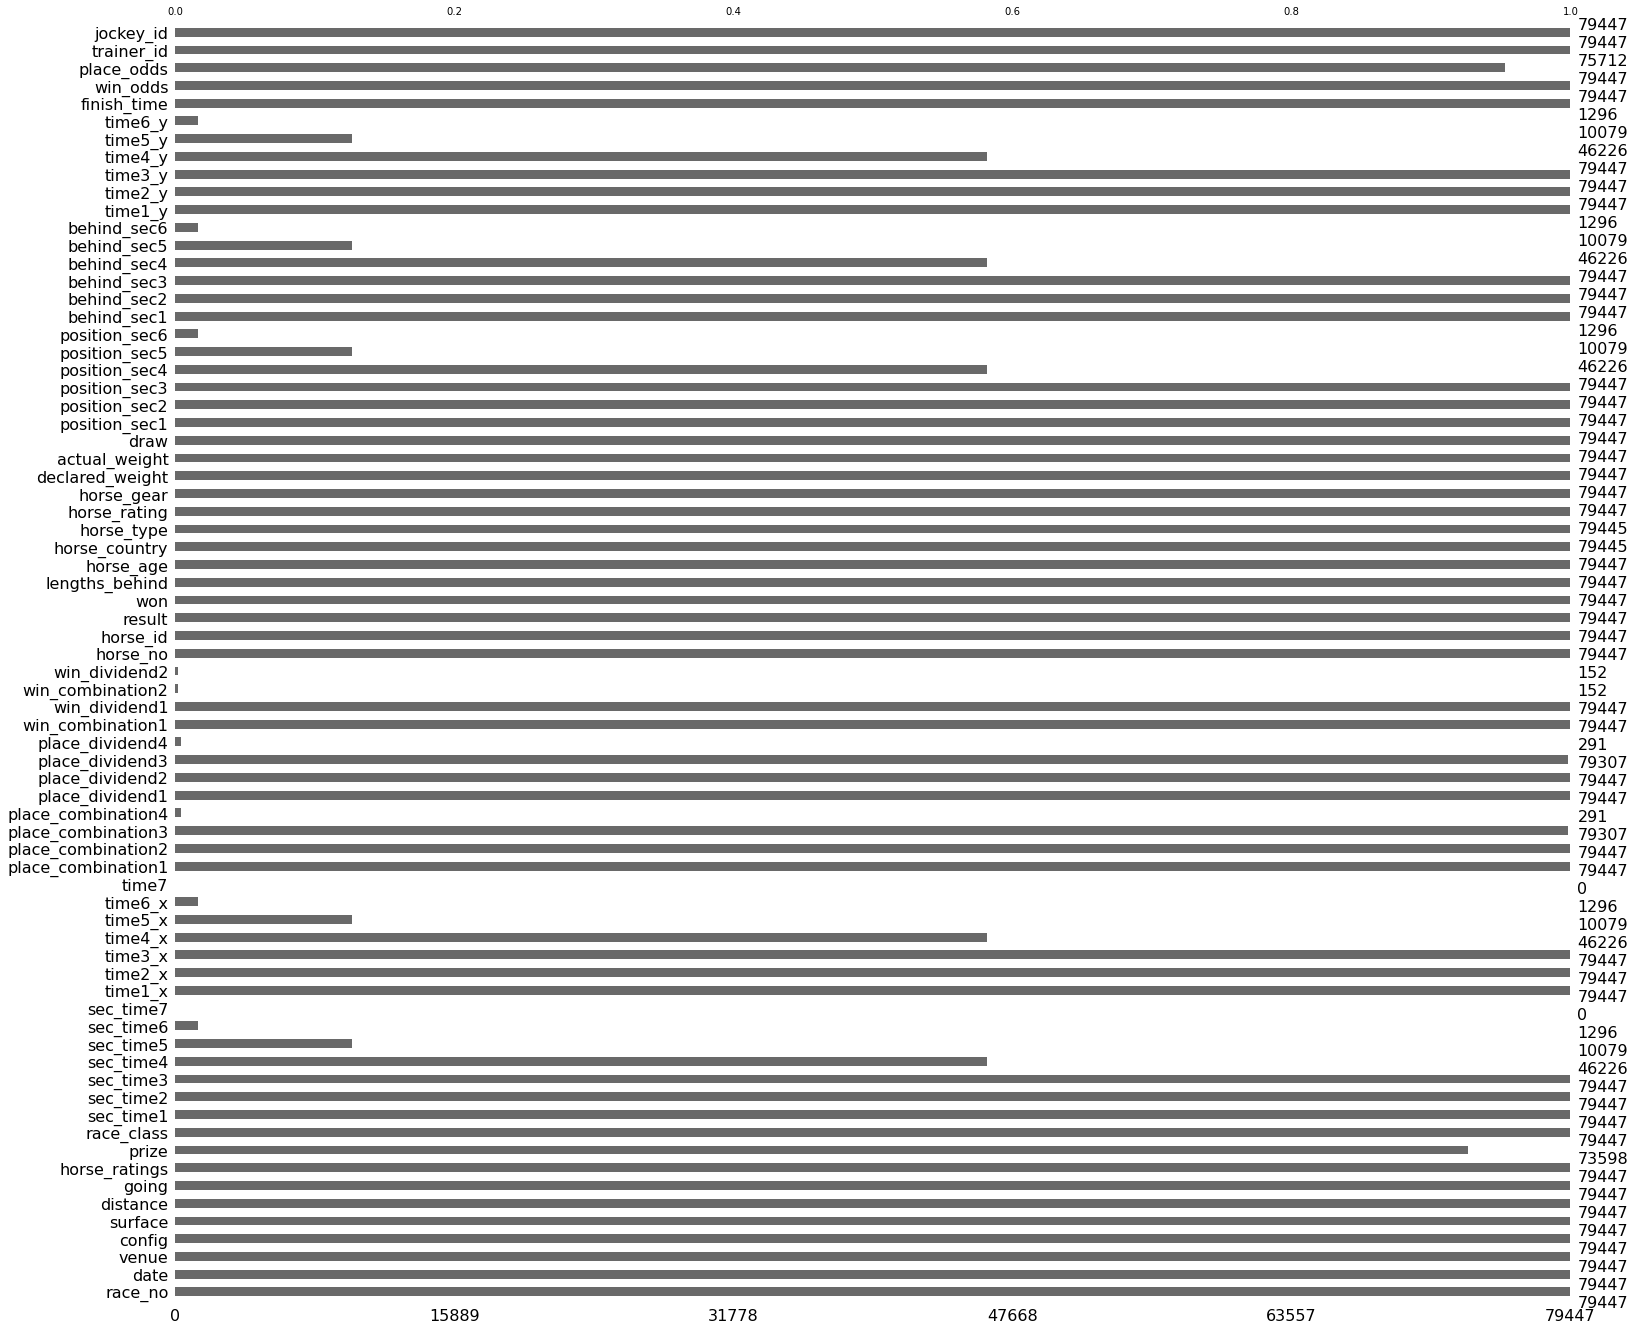

In [14]:
msno.bar(horses) #сколько заполнено ячеек по каждому столбцу

<AxesSubplot:>

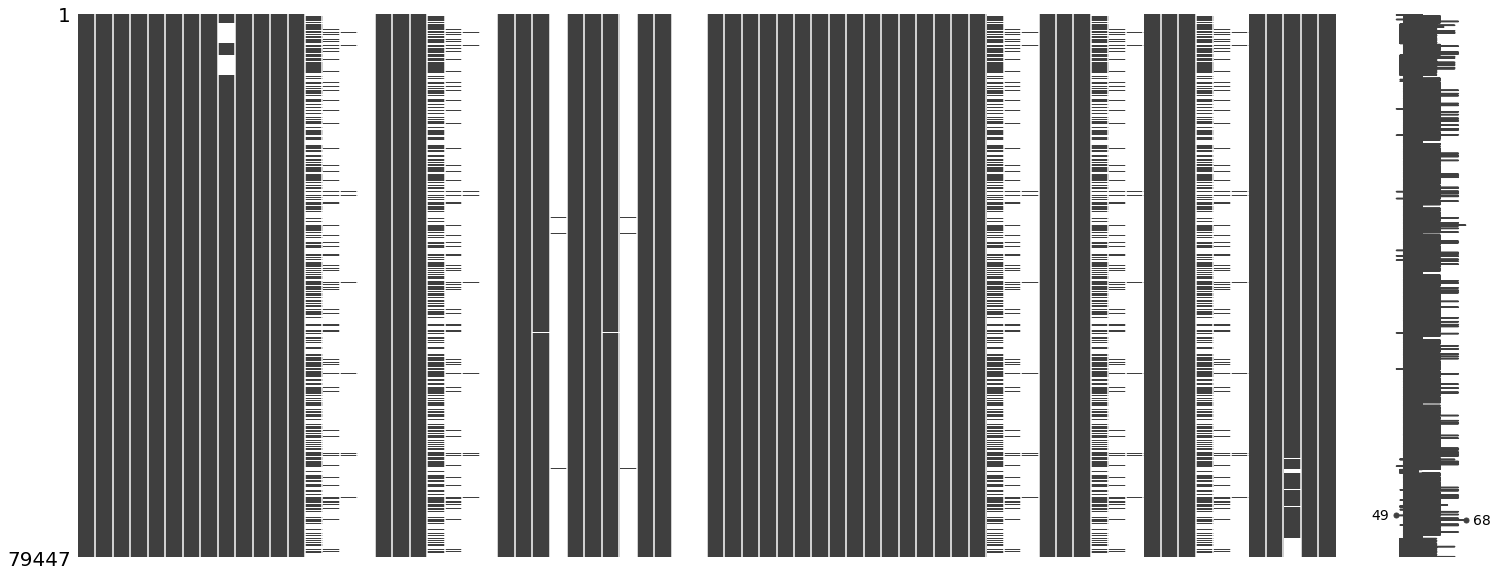

In [15]:
msno.matrix(horses) #распределение пропусков

#### <font color=#00AA72, font = 'Times New Roman'>  _Убираем незаполенные столбцы и столбцы, которые не помогут в анализе и проверяем распределение пропусков._  </font>

In [16]:
horses0 = horses.drop(['sec_time1', 'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6', 'sec_time7', 'time1_x',
       'time2_x', 'time3_x', 'time4_x', 'time5_x', 'time6_x', 'time7', 'place_combination1', 'place_combination2',
        'place_combination3', 'place_combination4', 'place_dividend1', 'place_dividend2', 'place_dividend3',
       'place_dividend4', 'win_combination1', 'win_dividend1', 'win_combination2', 'win_dividend2','position_sec1',
        'position_sec2', 'position_sec3', 'position_sec4', 'position_sec5', 'position_sec6', 'behind_sec1',
       'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1_y', 'time2_y', 'time3_y',
        'time4_y', 'time5_y','time6_y', 'horse_no', 'lengths_behind', 'draw', 'win_odds', 'place_odds', 'prize', 'result'], axis=1)
horses0.columns

Index(['race_no', 'date', 'venue', 'config', 'surface', 'distance', 'going',
       'horse_ratings', 'race_class', 'horse_id', 'won', 'horse_age',
       'horse_country', 'horse_type', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'finish_time', 'trainer_id',
       'jockey_id'],
      dtype='object')

<AxesSubplot:>

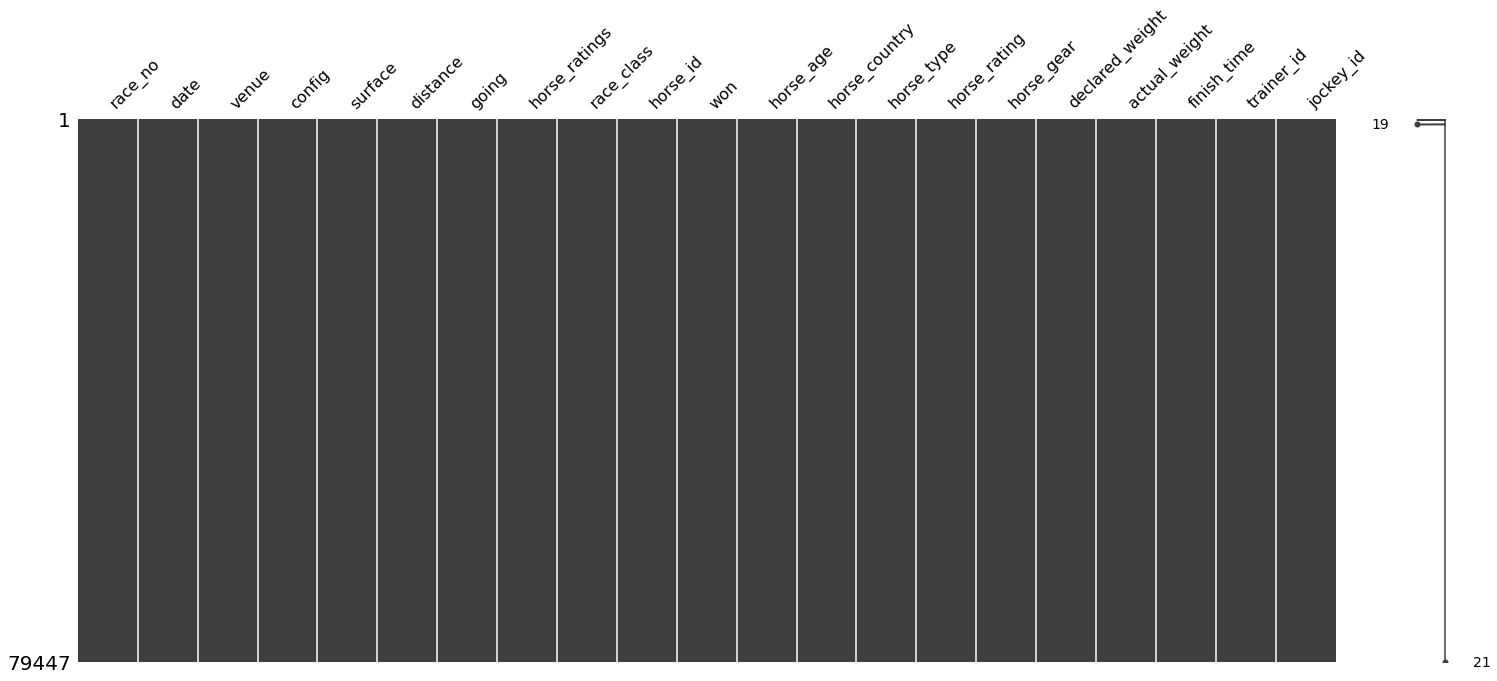

In [17]:
msno.matrix(horses0)

#### <font color=#00AA72, font = 'Times New Roman'>  _Теперь попробуем записать победу и поражение более удобно для восприятия. Сначала посмотрим, сколько всего в таблице побед и поражений, а потом поменяем название, проверяя, чтобы числа не изменились._  </font>

In [18]:
#проверяем, как записаны победы и проигрыши
horses0['won'].value_counts()

0.0    73087
1.0     6360
Name: won, dtype: int64

In [19]:
#меняем 0 на F[ail] и W[in]. Проверяем, чтобы количество выигрышей и проигрышей осталось неизменным
horses0.loc[(horses0.won==1.0), 'won']='W'
horses0.loc[(horses0.won==0.0), 'won']='F'
horses0['won'].value_counts()

F    73087
W     6360
Name: won, dtype: int64

In [20]:
#И добавляем еще один столбец, где проигрыши и выигрыши будут записаны как числа. Это нам понадобится для части графиков:
won_num = {'W':'1','F':'0'}
horses0['won_num'] = horses0['won'].map(won_num)
horses0 = horses0.astype({'won_num': 'int64'})
horses0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_no          79447 non-null  int64  
 1   date             79447 non-null  object 
 2   venue            79447 non-null  object 
 3   config           79447 non-null  object 
 4   surface          79447 non-null  int64  
 5   distance         79447 non-null  int64  
 6   going            79447 non-null  object 
 7   horse_ratings    79447 non-null  object 
 8   race_class       79447 non-null  int64  
 9   horse_id         79447 non-null  int64  
 10  won              79447 non-null  object 
 11  horse_age        79447 non-null  int64  
 12  horse_country    79445 non-null  object 
 13  horse_type       79445 non-null  object 
 14  horse_rating     79447 non-null  int64  
 15  horse_gear       79447 non-null  object 
 16  declared_weight  79447 non-null  float64
 17  actual_weigh

In [21]:
#Сразу проставим остальные числовые - числами:
horses0 = horses0.astype({'declared_weight': 'int64'})
horses0 = horses0.astype({'finish_time': 'int64'})
horses0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   race_no          79447 non-null  int64 
 1   date             79447 non-null  object
 2   venue            79447 non-null  object
 3   config           79447 non-null  object
 4   surface          79447 non-null  int64 
 5   distance         79447 non-null  int64 
 6   going            79447 non-null  object
 7   horse_ratings    79447 non-null  object
 8   race_class       79447 non-null  int64 
 9   horse_id         79447 non-null  int64 
 10  won              79447 non-null  object
 11  horse_age        79447 non-null  int64 
 12  horse_country    79445 non-null  object
 13  horse_type       79445 non-null  object
 14  horse_rating     79447 non-null  int64 
 15  horse_gear       79447 non-null  object
 16  declared_weight  79447 non-null  int64 
 17  actual_weight    79447 non-null

### <font color=#00AA72, font = 'Times New Roman'> Едим слона по частям. Поделим теперь все данные на три блока: лошадь, люди и трек с тем, чтобы посмотреть влияние данных на результат (победу и время финиша). Но так как данных действительно очень много, сделаем предположение, что наибольшее влияние на результат оказывает все же лошадь - этот блок и будем анализировать  </font>

#### <font color=#00AA72, font = 'Times New Roman'>  _Первый пойдет блок с треком, потом люди - последним блоком будет стоять лошадь. Сразу меняем местами колонки, чтобы его было удобнее читать_  </font>

In [22]:
df_track = horses0[['race_no', 'date', 'won', 'won_num', 'finish_time', 'venue', 'config', 'surface', 'distance',
                    'going']]
df_track[:13]

,race_no,date,won,won_num,finish_time,venue,config,surface,distance,going
0,1,1997-06-02,F,0,83,ST,A,0,1400,GOOD TO FIRM
1,1,1997-06-02,F,0,83,ST,A,0,1400,GOOD TO FIRM
2,1,1997-06-02,F,0,83,ST,A,0,1400,GOOD TO FIRM
3,1,1997-06-02,F,0,83,ST,A,0,1400,GOOD TO FIRM
4,1,1997-06-02,F,0,83,ST,A,0,1400,GOOD TO FIRM
5,1,1997-06-02,F,0,82,ST,A,0,1400,GOOD TO FIRM
6,1,1997-06-02,F,0,84,ST,A,0,1400,GOOD TO FIRM
7,1,1997-06-02,W,1,82,ST,A,0,1400,GOOD TO FIRM
8,1,1997-06-02,F,0,84,ST,A,0,1400,GOOD TO FIRM
9,1,1997-06-02,F,0,92,ST,A,0,1400,GOOD TO FIRM


In [23]:
# Т.к. жокеи зачастую привыкают работать на одной лошади, ставим еще и id лошади.
df_people = horses0[['race_no', 'date', 'won', 'won_num', 'finish_time', 'trainer_id', 'jockey_id', 'race_class', 'horse_id']]
df_people[:26]

,race_no,date,won,won_num,finish_time,trainer_id,jockey_id,race_class,horse_id
0,1,1997-06-02,F,0,83,118,2,5,3917
1,1,1997-06-02,F,0,83,164,57,5,2157
2,1,1997-06-02,F,0,83,137,18,5,858
3,1,1997-06-02,F,0,83,80,59,5,1853
4,1,1997-06-02,F,0,83,9,154,5,2796
5,1,1997-06-02,F,0,82,54,34,5,3296
6,1,1997-06-02,F,0,84,55,149,5,911
7,1,1997-06-02,W,1,82,47,183,5,2170
8,1,1997-06-02,F,0,84,75,131,5,1730
9,1,1997-06-02,F,0,92,109,145,5,2998


In [24]:
df_horses = horses0[['race_no', 'date', 'won', 'won_num', 'finish_time', 'race_class', 'horse_ratings', 'horse_id',
                     'horse_age', 'horse_country', 'horse_type', 'horse_rating', 'declared_weight', 'actual_weight']]
df_horses[:39]

,race_no,date,won,won_num,finish_time,race_class,horse_ratings,horse_id,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight
0,1,1997-06-02,F,0,83,5,40-15,3917,3,AUS,Gelding,60,1020,133
1,1,1997-06-02,F,0,83,5,40-15,2157,3,NZ,Gelding,60,980,133
2,1,1997-06-02,F,0,83,5,40-15,858,3,NZ,Gelding,60,1082,132
3,1,1997-06-02,F,0,83,5,40-15,1853,3,SAF,Gelding,60,1118,127
4,1,1997-06-02,F,0,83,5,40-15,2796,3,GB,Gelding,60,972,131
5,1,1997-06-02,F,0,82,5,40-15,3296,3,NZ,Gelding,60,1114,127
6,1,1997-06-02,F,0,84,5,40-15,911,3,NZ,Gelding,60,978,123
7,1,1997-06-02,W,1,82,5,40-15,2170,3,AUS,Gelding,60,1170,128
8,1,1997-06-02,F,0,84,5,40-15,1730,3,NZ,Gelding,60,1126,123
9,1,1997-06-02,F,0,92,5,40-15,2998,3,AUS,Mare,60,1072,125


### <font color=#00AA72, font = 'Times New Roman'> Окей, перейдем к более пристальной подготовке "лошадиного" датасета.</font>

#### <font color=#00AA72, font = 'Times New Roman'>  _Почистим данные в получившемся блоке. Для начала выведем самый интересный столбец - что имеется в виду под "типом лошади"?_  </font>

In [25]:
df_horses.horse_type.value_counts() #половина - о масти, половина - о поле... имеет смысл привести к единообразию

Gelding    75503
Brown       2044
Horse       1093
Colt         305
Mare         238
Rig          154
Roan          48
Filly         43
Grey          17
Name: horse_type, dtype: int64

#### <font color=#00AA72, font = 'Times New Roman'>  _В оригинале в "типе", судя по всему, должен стоять половой статус - кобыла, жеребец, мерин и пр. Но по факту сюда же занесли масть и возраст - что не имеет никакого смысла, т.к. масть на скорость не влияет, а возраст более точно указан отдельной колонкой. Приведем данные к однообразию (заранее проверив, сколько у нас лошадей какого "Типа")._  </font>

In [26]:
df_horses['horse_type'] = [elem if elem in ['Gelding', 'Colt', 'Mare', 'Filly', 'Rig']
                           else 'n/a' for elem in df_horses['horse_type']]
df_horses.horse_type.value_counts()

C:\Users\SaagV\AppData\Local\Temp\ipykernel_36848\1015005887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horses['horse_type'] = [elem if elem in ['Gelding', 'Colt', 'Mare', 'Filly', 'Rig']


Gelding    75503
n/a         3204
Colt         305
Mare         238
Rig          154
Filly         43
Name: horse_type, dtype: int64

In [27]:
df_horses['horse_type'] = np.where((df_horses.horse_type == 'Rig'), 'Colt', df_horses.horse_type)
df_horses['horse_type'] = np.where((df_horses.horse_type == 'Filly'), 'Mare', df_horses.horse_type)
df_horses['horse_type'].value_counts()

C:\Users\SaagV\AppData\Local\Temp\ipykernel_36848\4025880033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horses['horse_type'] = np.where((df_horses.horse_type == 'Rig'), 'Colt', df_horses.horse_type)
C:\Users\SaagV\AppData\Local\Temp\ipykernel_36848\4025880033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horses['horse_type'] = np.where((df_horses.horse_type == 'Filly'), 'Mare', df_horses.horse_type)


Gelding    75503
n/a         3204
Colt         459
Mare         281
Name: horse_type, dtype: int64

#### <font color=#00AA72, font = 'Times New Roman'>  _Теперь проверим столбцы, в которых могут быть подобные проблемы. Предполагаем, что уж время финиша точно записали верно)_  </font>

In [28]:
df_horses['horse_age'].value_counts()

3     61212
4      8007
5      4775
6      2244
2      2098
7       839
8       225
9        41
10        6
Name: horse_age, dtype: int64

In [29]:
df_horses['horse_country'].value_counts()

AUS    29906
NZ     27497
IRE    10473
GB      6329
USA     2499
FR      1257
SAF      685
GER      357
ARG      127
JPN       93
CAN       91
ITY       66
GR        33
BRZ       18
ZIM       12
SPA        2
Name: horse_country, dtype: int64

### <font color=#00AA72, font = 'Times New Roman'> Подготовка завершена, попробуем посмотреть, как и что влияет на выигрыш и время.</font>

#### <font color=#00AA72, font = 'Times New Roman'>  _Начнем с общей статистики: какие лошади чаще всего участвовали в скачках, сколько им в среднем лет, из какой они страны и пр._  </font>

<AxesSubplot:title={'center':'В каком возрасте лошади чаще всего участвуют в скачках?'}, xlabel='horse_age'>

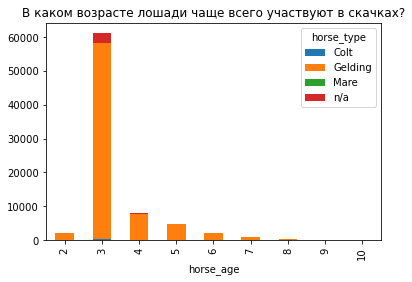

In [30]:
df_horses.groupby('horse_age')['horse_type'].value_counts().unstack().plot(
    kind = 'bar', stacked = True, title = 'В каком возрасте лошади чаще всего участвуют в скачках?')

In [31]:
#Посмотрим лошадиное распределение возраста
def find_anomaly(df = df_horses, column = 'horse_age'): 
    upper_level = df_horses[column].mean() + 3 * df_horses[column].std()
    lower_level = df_horses[column].mean() - 3 * df_horses[column].std()
    anomaly = df_horses[(df_horses[column] > upper_level) & (df_horses[column] < lower_level)]
    return upper_level, lower_level, anomaly
anomaly = find_anomaly(df = df_horses, column = 'horse_age')
anomaly

(5.969635540009081,
 0.7090559146713975,
 Empty DataFrame
 Columns: [race_no, date, won, won_num, finish_time, race_class, horse_ratings, horse_id, horse_age, horse_country, horse_type, horse_rating, declared_weight, actual_weight]
 Index: [])

Text(0.5, 1.0, '3 sigma')

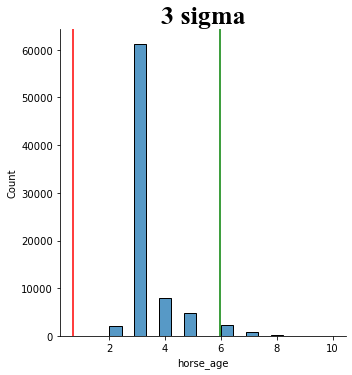

In [32]:
sns. displot (df_horses ['horse_age'])
plt.axvline(x = anomaly [0], color = 'g', linestyle = '-') 
plt.axvline(x = anomaly [1], color = 'r', linestyle = '-')
plt.title('3 sigma', fontsize = 26, fontweight = 'bold', font = 'Times New Roman')

#### <font color=#00AA72, font = 'Times New Roman'>  _Теперь посмотрим, какие лошади чаще всего побеждали._  </font>

[Text(0.5, 1.0, 'Частота побед в зависимости от возраста и типа лошади')]

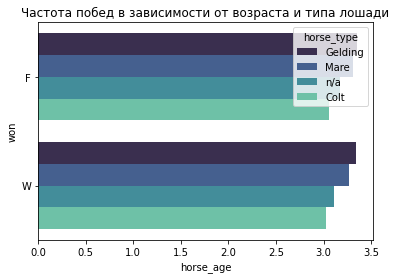

In [33]:
sns.barplot(
    x='horse_age', 
    y='won', 
    hue='horse_type', 
    data=df_horses,
    ci = None,
    palette = 'mako').set(title = 'Частота побед в зависимости от возраста и типа лошади')

In [34]:
pd.pivot_table(df_horses,
index = ['won'],
columns = ['horse_type'],
values = 'horse_age',
aggfunc = 'mean')

horse_type,Colt,Gelding,Mare,n/a
won,,,,
F,3.055422,3.349418,3.304511,3.172508
W,3.022727,3.338138,3.266667,3.113208


#### <font color=#00AA72, font = 'Times New Roman'>  _Создадим новый datafreim, в котором будут только победившие лошади._  </font>

In [35]:
df_won_horses = df_horses.loc[(df_horses['won'] == 'W')]
df_won_horses['won'].value_counts() #заодно проверяем, точно ли там только победители

W    6360
Name: won, dtype: int64

In [36]:
#удаляем лишние столбцы
df_won_horses = df_won_horses.drop(['won', 'won_num'], axis=1)
df_won_horses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6360 entries, 7 to 79434
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   race_no          6360 non-null   int64 
 1   date             6360 non-null   object
 2   finish_time      6360 non-null   int64 
 3   race_class       6360 non-null   int64 
 4   horse_ratings    6360 non-null   object
 5   horse_id         6360 non-null   int64 
 6   horse_age        6360 non-null   int64 
 7   horse_country    6360 non-null   object
 8   horse_type       6360 non-null   object
 9   horse_rating     6360 non-null   int64 
 10  declared_weight  6360 non-null   int64 
 11  actual_weight    6360 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 546.6+ KB


#### <font color=#00AA72, font = 'Times New Roman'>  _Посмотрим в процентах тип победителей._  </font>

In [37]:
count_colts = len(df_won_horses[df_won_horses['horse_type']=='Colt'])
count_geld = len(df_won_horses[df_won_horses['horse_type']=='Gelding'])
count_mare = len(df_won_horses[df_won_horses['horse_type']=='Mare'])
count_na = len(df_won_horses[df_won_horses['horse_type']=='n/a'])
pct_of_colts = count_colts/(count_colts+count_geld+count_mare+count_na)
pct_of_geld = count_geld/(count_colts+count_geld+count_mare+count_na)
pct_of_mare = count_mare/(count_colts+count_geld+count_mare+count_na)
pct_of_na = count_na/(count_colts+count_geld+count_mare+count_na)
print("Процент победивших кобыл - ", "{0:.2f}".format(pct_of_mare*100))
print("Процент победивших меринов - ", "{0:.2f}".format(pct_of_geld*100))
print("Процент победивших жеребцов - ", "{0:.2f}".format(pct_of_colts*100))
print("Процент победивших лошадей - ", "{0:.2f}".format(pct_of_na*100))

Процент победивших кобыл -  0.24
Процент победивших меринов -  94.91
Процент победивших жеребцов -  0.69
Процент победивших лошадей -  4.17


Text(0.5, 1.0, '3 sigma для победителей')

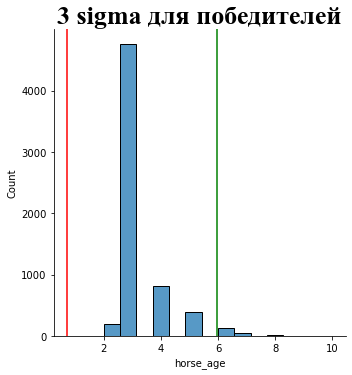

In [38]:
sns. displot (df_won_horses ['horse_age'])
plt.axvline(x = anomaly [0], color = 'g', linestyle = '-') 
plt.axvline(x = anomaly [1], color = 'r', linestyle = '-')
plt.title('3 sigma для победителей', fontsize = 26, fontweight = 'bold', font = 'Times New Roman')

#### <font color=#00AA72, font = 'Times New Roman'>  _Мы знаем, что чаще всего побеждали мерины - но мы знаем также, что меринов в принципе участвовало больше всего. Давайте выведем победы в процентном соотношении для возраста, страны и "пола" лошадей:_  </font>

In [39]:
df_horses_age_type_country = pd.crosstab([df_won_horses.horse_age, df_won_horses.horse_country], df_won_horses.horse_type, 
            rownames=['Возраст лошади', 'Страна лошади'], colnames=['Тип лошади'], normalize='columns',
            margins = True).style.format('{:.2%}')
df_horses_age_type_country

#### <font color=#00AA72, font = 'Times New Roman'>  _Очень красиво и ничего непонятно. Построим тепловую карту, где самые светлые цвета будут означать самые низкие значения:_  </font>

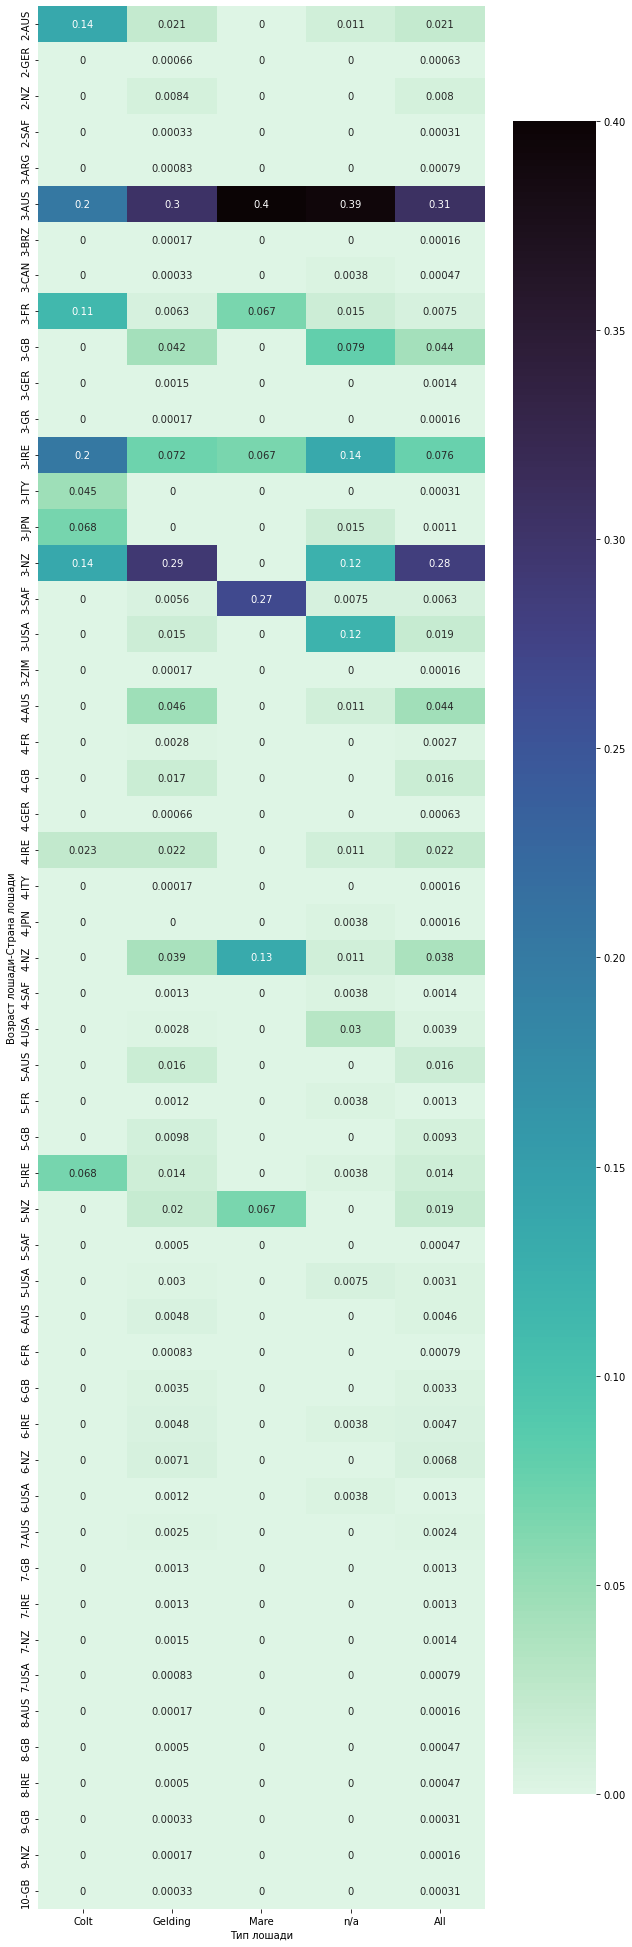

In [40]:
plt.figure(figsize=(10, 35))
sns.heatmap(
    pd.crosstab(
        [df_won_horses.horse_age, df_won_horses.horse_country], df_won_horses.horse_type, 
        rownames=['Возраст лошади', 'Страна лошади'],
        colnames=['Тип лошади'], normalize='columns',
        margins = True),
    annot = True, cmap='mako_r')
plt.show()

#### <font color=#00AA72, font = 'Times New Roman'>  _Построим аналогичную тепловую карту для возраста и типа лошади:_  </font>

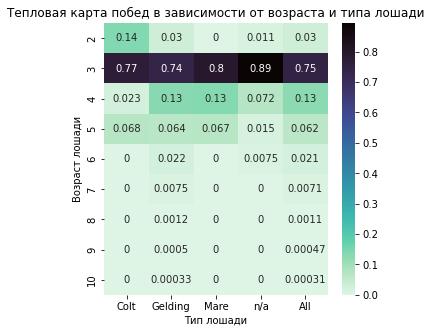

In [41]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    pd.crosstab(
        df_won_horses.horse_age, df_won_horses.horse_type,
        rownames=['Возраст лошади'],
        colnames=['Тип лошади'], normalize='columns',
        margins = True),
    annot = True, cmap='mako_r').set(title = 'Тепловая карта побед в зависимости от возраста и типа лошади')
plt.show()

#### <font color=#00AA72, font = 'Times New Roman'>  _Давайте теперь посмотрим менее точно, но более понятно - сгруппируем страны, из которых меньше сотни победителей, и посмотрим их соотношение:_  </font>

In [42]:
df_won_horses['horse_country'].value_counts()

AUS    2517
NZ     2271
IRE     749
GB      473
USA     179
FR       78
SAF      54
GER      17
JPN       8
ARG       5
CAN       3
ITY       3
ZIM       1
BRZ       1
GR        1
Name: horse_country, dtype: int64

In [43]:
df_won_horses['horse_country'] = [elem if elem in ['AUS', 'NZ', 'IRE', 'GB', 'USA'\
                                                         ] else 'Other' for elem in df_won_horses['horse_country']]
df_won_horses['horse_country'].value_counts()

AUS      2517
NZ       2271
IRE       749
GB        473
USA       179
Other     171
Name: horse_country, dtype: int64

<AxesSubplot:title={'center':'Круговая диаграмма распределения победивших лошадей по странам'}>

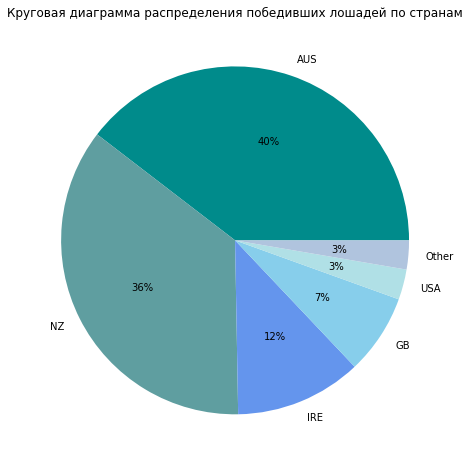

In [44]:
df_hoco = df_won_horses['horse_country'].value_counts()
df_hoco.plot.pie(autopct = '%1.0f%%', figsize=(8, 8),
                 colors = ['#008B8B', '#5F9EA0', '#6495ED', '#87CEEB', '#B0E0E6', '#B0C4DE'], ylabel='',
                 title = 'Круговая диаграмма распределения победивших лошадей по странам')

#### <font color=#00AA72, font = 'Times New Roman'>  _Поработаем со временем финиша. Посмотрим статистику, распределение и пр._  </font>

In [45]:
df_won_horses.sort_values(by = 'finish_time', ascending=True)

,race_no,date,finish_time,race_class,horse_ratings,horse_id,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight
43319,9,2001-11-25,55,3,80-60,3669,2,NZ,Gelding,63,1088,118
48826,7,2002-07-17,55,2,100-80,450,4,AUS,Gelding,99,1158,133
57428,8,2003-06-14,55,3,80-60,2562,3,NZ,Gelding,67,1125,120
64230,9,2004-01-18,55,2,100-80,1955,6,AUS,Gelding,87,1093,123
65993,2,2004-03-13,55,4,60-40,493,8,AUS,Gelding,44,1074,117
...,...,...,...,...,...,...,...,...,...,...,...,...
64460,8,2004-01-24,150,13,80+,1357,4,IRE,Gelding,102,1112,122
25961,7,2000-01-22,150,13,G,279,3,IRE,Gelding,60,1035,113
36072,8,2001-02-11,150,11,G,3660,3,AUS,Gelding,60,1079,126
54711,8,2003-01-19,153,13,80+,1538,5,Other,Gelding,102,996,133


In [46]:
df_won_horses.groupby('horse_type')['finish_time'].agg(['mean','std','median', 'max', 'min'])

,mean,std,median,max,min
horse_type,,,,,
Colt,85.272727,20.872106,82.0,148,56
Gelding,83.842445,18.519678,82.0,153,55
Mare,86.600000,31.780048,70.0,147,55
n/a,87.932075,22.424856,83.0,158,56


In [47]:
df_won_horses.sort_values(by = 'finish_time', ascending=True)

,race_no,date,finish_time,race_class,horse_ratings,horse_id,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight
43319,9,2001-11-25,55,3,80-60,3669,2,NZ,Gelding,63,1088,118
48826,7,2002-07-17,55,2,100-80,450,4,AUS,Gelding,99,1158,133
57428,8,2003-06-14,55,3,80-60,2562,3,NZ,Gelding,67,1125,120
64230,9,2004-01-18,55,2,100-80,1955,6,AUS,Gelding,87,1093,123
65993,2,2004-03-13,55,4,60-40,493,8,AUS,Gelding,44,1074,117
...,...,...,...,...,...,...,...,...,...,...,...,...
64460,8,2004-01-24,150,13,80+,1357,4,IRE,Gelding,102,1112,122
25961,7,2000-01-22,150,13,G,279,3,IRE,Gelding,60,1035,113
36072,8,2001-02-11,150,11,G,3660,3,AUS,Gelding,60,1079,126
54711,8,2003-01-19,153,13,80+,1538,5,Other,Gelding,102,996,133


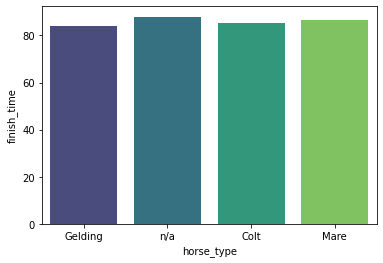

In [50]:
sns.barplot(
    x='horse_type', 
    y='finish_time', 
    data=df_won_horses,
    ci = None,
    palette = 'viridis');

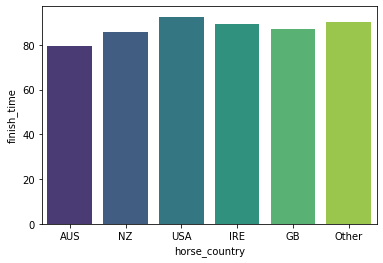

In [51]:
sns.barplot(
    x='horse_country', 
    y='finish_time', 
    data=df_won_horses,
    ci = None,
    palette = 'viridis');

<AxesSubplot:xlabel='actual_weight', ylabel='finish_time'>

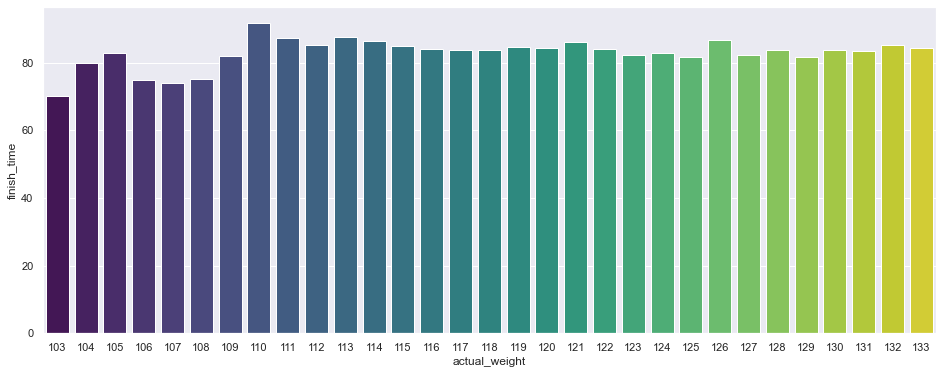

In [52]:
sns.set(rc={'figure.figsize': [16.0, 6.0]})
sns.barplot(
    x='actual_weight', 
    y='finish_time', 
    data=df_won_horses,
    ci = None,
    palette = 'viridis')

#### <font color=#00AA72, font = 'Times New Roman'>  _Попробуем оставить три группы веса: маленький, средний и большой._  </font>

In [53]:
def actual_weight_cat (actual_weight):
    if actual_weight <=113:
        return 'Низкий вес'
    elif actual_weight <=123:
        return 'Средний вес'
    elif actual_weight >= 124:
        return 'Большой вес'
    else:
        return actual_weight

In [54]:
df_won_horses['actual_weight'] = df_won_horses['actual_weight'].apply(actual_weight_cat)
df_won_horses

,race_no,date,finish_time,race_class,horse_ratings,horse_id,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight
7,1,1997-06-02,82,5,40-15,2170,3,AUS,Gelding,60,1170,Большой вес
18,2,1997-06-02,70,5,40-15,3915,3,AUS,Gelding,60,1148,Большой вес
38,3,1997-06-02,83,4,60-40,2162,3,AUS,Gelding,60,1149,Средний вес
46,4,1997-06-02,68,1,120-95,3872,3,NZ,Gelding,60,1231,Средний вес
55,5,1997-06-02,95,4,60-40,97,3,AUS,Gelding,60,1044,Большой вес
...,...,...,...,...,...,...,...,...,...,...,...,...
79388,6,2005-08-28,83,1,115-95,3754,5,AUS,Gelding,106,1136,Большой вес
79397,7,2005-08-28,93,11,G,2248,5,IRE,Gelding,126,1156,Большой вес
79408,8,2005-08-28,120,11,G,2375,4,Other,n/a,100,1134,Большой вес
79427,9,2005-08-28,69,2,100-80,3539,3,AUS,Gelding,85,1113,Средний вес


<AxesSubplot:xlabel='actual_weight', ylabel='finish_time'>

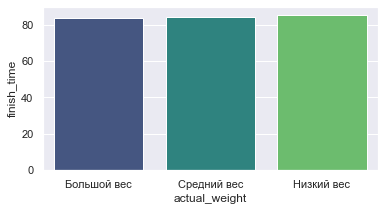

In [55]:
sns.set(rc={'figure.figsize': [6.0, 3.0]})
sns.barplot(
    x='actual_weight', 
    y='finish_time', 
    data=df_won_horses,
    ci = None,
    palette = 'viridis')

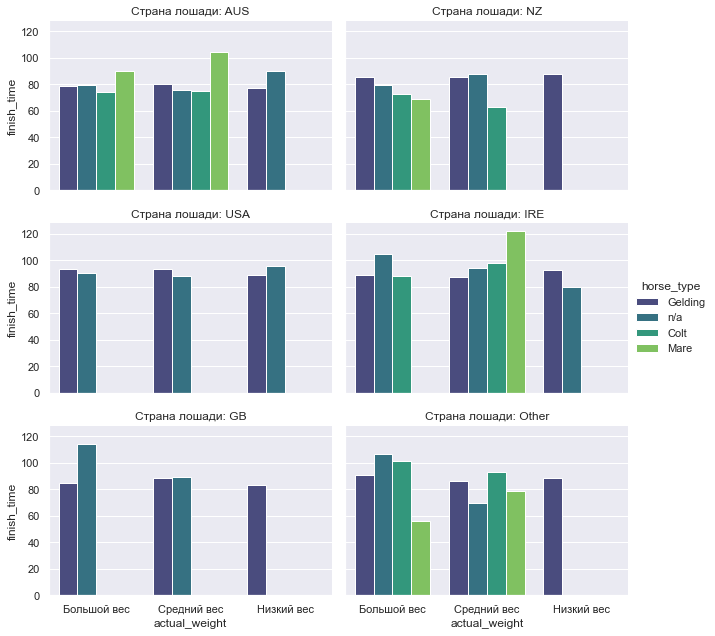

In [59]:
horses_speed = sns.catplot(
        x='actual_weight', 
        y='finish_time', 
        data=df_won_horses, ci = None,
        palette='viridis',
        height=3, aspect=1.5,
        kind='bar',
        hue='horse_type',
        col ='horse_country',
        col_wrap=2) 
horses_speed.set_titles('Страна лошади: {col_name}');

### <font color=#00AA72, font = 'Times New Roman'> Основные выводы:</font>

**1. Чаще всего (и в процентном, и в фактическом значении) побеждали 3-хлетние мерины - однако стоит учитывать, что именно эти лошади чаще всего участвовали в скачках (по опыту знакомых - потому и участвовали).**

**2. Вес незначительно, но влияет на время финиша - чем меньше вес, тем быстрее лошадь.**


**3. Больше всего победителей из Австралии - однако считать страну происхождения существенным фактором, влияющим на победу, рано - выборка по другим странам слишком маленькая.**